
2) 데이터 탐색

[head()]
   날짜  아메리카노  라떼  디저트  날씨
0  1일     50  30   20  맑음
1  2일     60  40   25  맑음
2  3일     55  35   18   비
3  4일     70  45   30  맑음
4  5일     65  38   28  흐림

[info()]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      14 non-null     object
 1   아메리카노   14 non-null     int64 
 2   라떼      14 non-null     int64 
 3   디저트     14 non-null     int64 
 4   날씨      14 non-null     object
dtypes: int64(3), object(2)
memory usage: 692.0+ bytes
None

[describe()] (숫자 컬럼 요약)
            아메리카노         라떼        디저트
count   14.000000  14.000000  14.000000
mean    81.642857  53.500000  39.714286
std     20.664377  15.356031  15.279089
min     50.000000  30.000000  18.000000
25%     66.250000  41.250000  28.500000
50%     82.500000  52.500000  39.000000
75%     93.750000  63.750000  48.750000
max    120.000000  80.000000  70.000000

3) 데이터 가공

[가

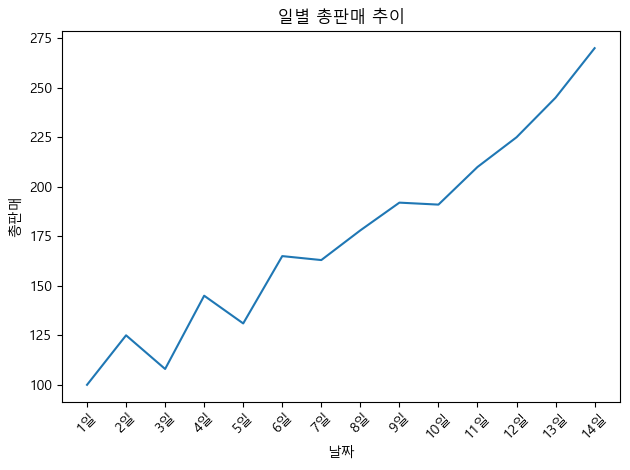

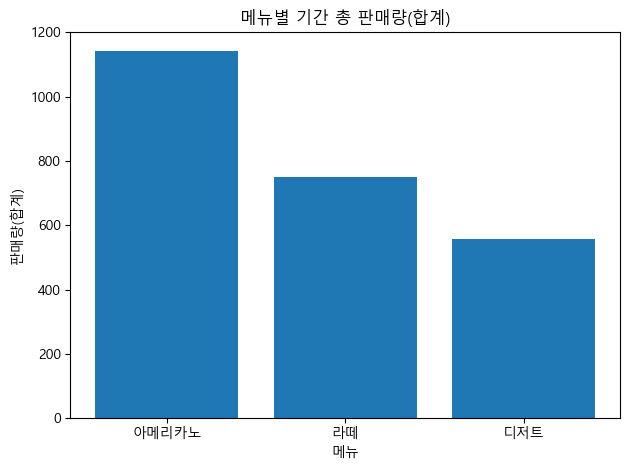

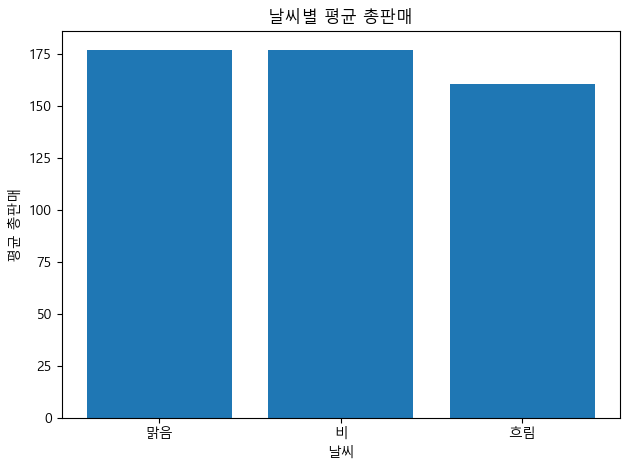

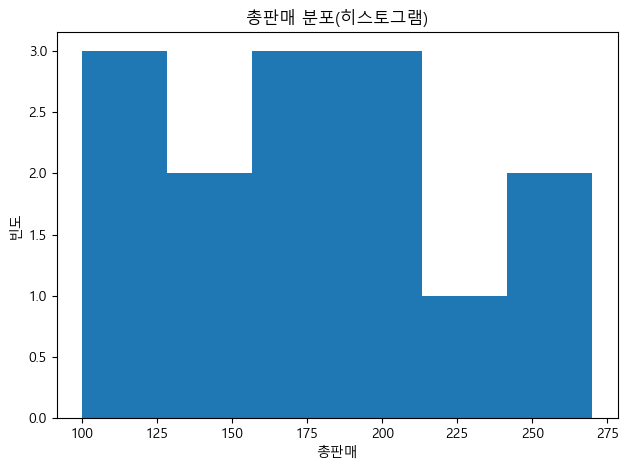

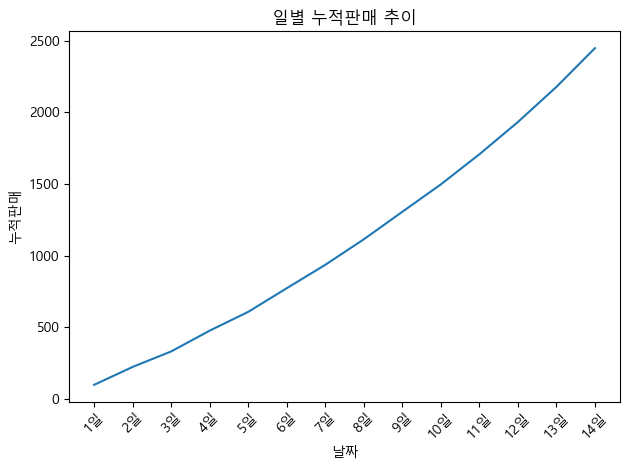


6) 인사이트(자동 요약)

[비 오는 날 평균 총판매] 177.00
[비 아닌 날 평균 총판매] 174.27
[차이(비 - 비아님)] 2.73

[기간 효자 메뉴] 아메리카노 (총합 1143)

[변동성 코멘트] 매출 변동성이 큰 편이라 원인(날씨/이벤트 등) 분석이 필요합니다. (std/mean = 0.28)

[전략 제안 3줄]
- 비 오는 날에도 매출이 유지되거나 높은 편이라, 우천일 프로모션을 강화해도 좋습니다.
- 전체 기간 기준 효자 메뉴는 '아메리카노'로, 해당 메뉴를 중심으로 세트/업셀링 구성이 유효합니다.
- '아메리카노'와(과) '라떼'의 상관관계가 상대적으로 높아(≈ 0.99), 함께 묶는 프로모션/세트 판매를 고려할 수 있습니다.

7) 저장
저장 완료: cafe_sales_analysis_result.csv

프로젝트 종료!


In [52]:
"""
카페 매출 데이터 분석 미니 프로젝트 (NumPy + Pandas + Matplotlib)
- 아래 코드는 "수업용"으로, 코드 흐름(순서)대로 설명을 최대한 자세히 주석으로 달았습니다.
- 문법/개념(변수, 딕셔너리, 리스트, DataFrame, 인덱스, groupby, 조건필터, 반복문 등)을 코드 바로 옆에서 설명합니다.
- 함수/메서드(예: head, info, describe, cumsum, diff, idxmax, groupby, corr, sort_values 등)가 "무슨 역할"인지도 주석으로 설명합니다.

실행 환경:
- Python 3.x
- pip install numpy pandas matplotlib
"""

# =========================
# [A] 라이브러리 import
# =========================

# import: 다른 사람이 만들어둔 기능(라이브러리)을 가져오는 문법
# as: 별명(alias). 긴 이름을 짧게 쓰려고 사용
import numpy as np              # numpy를 np라는 별명으로 사용
import pandas as pd             # pandas를 pd라는 별명으로 사용
import matplotlib.pyplot as plt # matplotlib.pyplot을 plt라는 별명으로 사용

# - numpy(np): 숫자 계산(평균, 표준편차 등) 같은 "수학/통계" 처리에 강함
# - pandas(pd): 표(테이블) 형태의 데이터 처리(DataFrame) 전문
# - matplotlib(plt): 그래프 그리기 전문

# 참고(용어)
# - 함수(function): print(), len()처럼 "단독으로" 쓰는 기능
# - 메서드(method): df.head()처럼 "어떤 객체(데이터) 뒤에 붙는" 기능
#   예) df.head()에서 head()는 df(DataFrame)의 메서드


# =========================
# [B] pandas 출력 옵션(선택)
# =========================

# pd.set_option(옵션이름, 값):
# - pandas가 DataFrame을 콘솔에 출력할 때 "보기 좋게" 설정하는 기능
# - 분석 결과 자체는 바뀌지 않고 "화면 출력"만 바뀜
# display.width: 출력 폭(줄바꿈이 덜 생김)
# display.max_columns: 최대 몇 개 컬럼까지 출력할지
# display.max_rows: 최대 몇 개 행까지 출력할지
pd.set_option("display.width", 120)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 200)


# =========================
# [1] 데이터 준비 (예제 데이터 생성)
# =========================

# data는 "딕셔너리(dict)" 자료형
# - dict는 {키: 값} 구조
# - 여기서는 "컬럼명"을 키로, "컬럼의 값들(리스트)"을 값으로 넣음
#
# 리스트(list):
# - [값1, 값2, 값3 ...] 형태의 "순서가 있는" 자료형
# - 여기서는 날짜별 판매량을 순서대로 넣기 때문에 리스트가 적합
#
# 주의:
# - 모든 컬럼의 리스트 길이는 반드시 같아야 함
#   (길이가 다르면 표(DataFrame)를 만들 수 없음: 행의 개수가 달라지기 때문)
data = {
    "날짜": [
        "1일","2일","3일","4일","5일","6일","7일",
        "8일","9일","10일","11일","12일","13일","14일"
    ],
    "아메리카노": [50,60,55,70,65,80,75,85,90,88,95,100,110,120],
    "라떼":       [30,40,35,45,38,50,48,55,60,58,65,70,75,80],
    "디저트":     [20,25,18,30,28,35,40,38,42,45,50,55,60,70],
    "날씨": [
        "맑음","맑음","비","맑음","흐림","맑음","맑음",
        "비","맑음","흐림","맑음","맑음","비","맑음"
    ],
}

# pd.DataFrame(data):
# - pandas의 핵심 자료구조 "DataFrame" 생성
# - DataFrame은 엑셀 시트처럼 "행(row) + 열(column)" 구조의 표 데이터
# - 열(column): 날짜/아메리카노/라떼/디저트/날씨
# - 행(row): 1일~14일 각 하루 데이터
df = pd.DataFrame(data)


# =========================
# [2] 데이터 탐색
# - 데이터가 어떻게 생겼는지 확인하는 단계
# =========================
print("\n=========================")
print("2) 데이터 탐색")
print("=========================")

# print() 함수:
# - 괄호 안의 내용을 화면에 출력
# - \n은 줄바꿈 문자

# df.head(n=5):
# - "처음 n개 행"을 보여주는 메서드 (기본값 n=5)
# - 데이터가 제대로 들어왔는지 빠르게 확인할 때 사용
print("\n[head()]")
print(df.head())

# df.info():
# - 각 컬럼의 데이터 타입(dtype), 결측치(비어있는 값) 개수 등을 요약
# - dtype 예시:
#   - int64: 정수
#   - float64: 실수
#   - object: 보통 문자열(텍스트)
# - 결측치(NA/NaN)가 있는지도 확인 가능
print("\n[info()]")
print(df.info())

# df.describe():
# - 숫자 컬럼 대상으로 통계 요약을 보여줌
# - 결과 컬럼 의미:
#   - count: 개수
#   - mean : 평균
#   - std  : 표준편차(값의 흩어짐 정도)
#   - min/max: 최소/최대
#   - 25%/50%/75%: 사분위수(데이터 분포 위치)
#
# df[["아메리카노","라떼","디저트"]]:
# - 대괄호 [] 문법은 "선택"의 의미
# - 리스트 형태로 컬럼명을 넣으면 해당 컬럼들만 뽑은 DataFrame이 됨
print("\n[describe()] (숫자 컬럼 요약)")
print(df[["아메리카노","라떼","디저트"]].describe())


# =========================
# [3] 데이터 가공
# - 분석이 가능하도록 새로운 컬럼을 만들거나 형태를 바꾸는 단계
# =========================
print("\n=========================")
print("3) 데이터 가공")
print("=========================")

# df["컬럼명"] 문법:
# - DataFrame에서 특정 컬럼을 선택하는 문법
# - 없는 컬럼명에 값을 넣으면 "새 컬럼 생성"
# - 있는 컬럼명에 값을 넣으면 "컬럼 덮어쓰기/수정"

# [3-1] 총판매 만들기
# - 각 날짜별로(행 단위로) 아메리카노+라떼+디저트를 더함
# - pandas는 컬럼끼리 연산하면 "자동으로 같은 행끼리" 계산됨
df["총판매"] = df["아메리카노"] + df["라떼"] + df["디저트"]

# [3-2] 누적판매 만들기
# cumsum() 메서드:
# - cumulative sum = 누적합
# - 위에서부터 계속 더한 값
#   예) [10, 20, 30] → cumsum → [10, 30, 60]
df["누적판매"] = df["총판매"].cumsum()

# [3-3] 전날 대비 변화량 만들기
# diff() 메서드:
# - difference = (현재값 - 이전값)
# - 전날 대비 얼마나 늘었는지/줄었는지 확인 가능
# - 첫날은 이전값이 없어서 NaN(값 없음)이 나옴
df["총판매_변화"] = df["총판매"].diff()

# [3-4] 메뉴 비중(일별)
# - 각 메뉴가 총판매에서 차지하는 비율(0~1)
# - 예: 0.5 = 50% 의미
df["아메리카노_비중"] = df["아메리카노"] / df["총판매"]
df["라떼_비중"]       = df["라떼"]       / df["총판매"]
df["디저트_비중"]     = df["디저트"]     / df["총판매"]

print("\n[가공 결과 미리보기]")
print(df)


# =========================
# [4] 분석
# - 의미 있는 결론을 뽑기 위한 계산
# =========================
print("\n=========================")
print("4) 분석")
print("=========================")

# -----------------------------------------
# 4-1) 최고/최저 매출일 찾기
# -----------------------------------------

# idxmax() / idxmin() 메서드:
# - 해당 컬럼에서 최댓값/최솟값이 있는 "행 인덱스(index)"를 반환
# - index는 DataFrame에서 행을 구분하는 번호(기본은 0부터 시작)
#   예) 0번째 행, 1번째 행, 2번째 행...
#
# .loc[인덱스] 문법:
# - loc은 label(라벨) 기반 선택
# - 기본 인덱스는 0,1,2... 라서 사실상 "해당 행 선택" 기능으로 자주 사용
max_row = df.loc[df["총판매"].idxmax()]
min_row = df.loc[df["총판매"].idxmin()]

print("\n[최고 매출일]")
print(max_row[["날짜","날씨","총판매","아메리카노","라떼","디저트"]])

print("\n[최저 매출일]")
print(min_row[["날짜","날씨","총판매","아메리카노","라떼","디저트"]])

# -----------------------------------------
# 4-2) 평균/중앙값
# -----------------------------------------

# mean(): 평균(합계/개수)
# median(): 중앙값(정렬했을 때 가운데 값)
# - 평균은 특정 날 매출이 너무 크거나(극단값) 너무 작으면 영향 받을 수 있음
# - 중앙값은 극단값에 덜 흔들림
mean_total = df["총판매"].mean()
median_total = df["총판매"].median()

# f-string 문법:
# - f"문장 {변수}" 형태로 문자열 안에 변수를 넣는 방법
# - :.2f 는 소수 둘째 자리까지 표시
print(f"\n[총판매 평균] {mean_total:.2f}")
print(f"[총판매 중앙값] {median_total:.2f}")

# -----------------------------------------
# 4-3) 날씨별 평균 총판매
# -----------------------------------------

# groupby("컬럼"):
# - 같은 값끼리 묶는 기능(그룹 만들기)
# - 여기서는 날씨(맑음/흐림/비)로 묶음
#
# ["총판매"].mean():
# - 그룹별로 총판매 평균 계산
#
# sort_values(ascending=False):
# - 값을 기준으로 내림차순 정렬(큰 값이 위로)
weather_mean = df.groupby("날씨")["총판매"].mean().sort_values(ascending=False)

print("\n[날씨별 평균 총판매]")
print(weather_mean)

# -----------------------------------------
# 4-4) 메뉴별 합계/평균
# -----------------------------------------

# sum(): 합계(기간 전체 판매량)
# mean(): 평균(하루 평균 판매량)
# sort_values(): 값 기준 정렬
menu_sum = df[["아메리카노","라떼","디저트"]].sum().sort_values(ascending=False)
menu_mean = df[["아메리카노","라떼","디저트"]].mean().sort_values(ascending=False)

print("\n[메뉴별 총합(기간 합계)]")
print(menu_sum)

print("\n[메뉴별 평균(일 평균)]")
print(menu_mean)

# -----------------------------------------
# 4-5) 변동성(표준편차) - NumPy 사용
# -----------------------------------------

# np.std(데이터):
# - 표준편차(흩어짐 정도)를 구하는 함수
# - 값이 크면 매출이 들쭉날쭉(변동이 큼) → "안정적이지 않다"라고 해석 가능
#
# ddof:
# - ddof=0(기본): 모집단 표준편차(데이터 전체를 모집단이라고 볼 때)
# - ddof=1: 표본 표준편차(데이터가 일부 샘플이라고 볼 때)
std_total = np.std(df["총판매"])
std_total_sample = np.std(df["총판매"], ddof=1)

print(f"\n[총판매 표준편차(모집단, ddof=0)] {std_total:.2f}")
print(f"[총판매 표준편차(표본, ddof=1)] {std_total_sample:.2f}")

# -----------------------------------------
# 4-6) 상관관계(메뉴끼리)
# -----------------------------------------

# corr(): 상관계수(-1 ~ 1)
# - 1에 가까울수록 같이 오르는 경향(양의 상관)
# - -1에 가까울수록 반대로 움직이는 경향(음의 상관)
# - 0에 가까우면 관계가 거의 없음(무상관에 가까움)
corr_menu = df[["아메리카노","라떼","디저트"]].corr()

print("\n[메뉴 간 상관관계]")
print(corr_menu)

# -----------------------------------------
# 4-7) 평균 이상인 날만 필터링(조건 검색)
# -----------------------------------------

# df[조건] 문법:
# - 조건이 True인 행만 남김(필터링)
# - 예: df["총판매"] > mean_total → 총판매가 평균보다 큰 행만 True
above_mean_df = df[df["총판매"] > mean_total]

print("\n[총판매 평균 이상인 날]")
print(above_mean_df[["날짜","날씨","총판매"]])

# -----------------------------------------
# 4-8) 성장 추세(전일 대비 증가량 합)
# -----------------------------------------

# diff(): 전일 대비 변화량
diff_menu = df[["아메리카노","라떼","디저트"]].diff()

# sum(): 변화량을 기간 전체로 합산
# - 단순한 "성장감" 지표(정밀한 성장률은 아니고, 흐름을 보는 용도)
growth_score = diff_menu.sum().sort_values(ascending=False)

print("\n[메뉴별 전일 대비 증가량 합(성장감 지표)]")
print(growth_score)


# =========================
# [5] 시각화
# - 분석 결과를 그래프로 보여주는 단계
# =========================
print("\n=========================")
print("5) 시각화")
print("=========================")

# plt.figure():
# - 새 그래프(도화지) 시작
# - 여러 그래프를 그릴 때 figure()로 구분하면 깔끔함

# plt.plot(x, y):
# - 선 그래프
# - 시간 흐름(추세)을 보기 좋음(일별 매출 변화 등)
plt.figure()
plt.plot(df["날짜"], df["총판매"])
plt.title("일별 총판매 추이")  # 그래프 제목
plt.xlabel("날짜")             # x축 이름
plt.ylabel("총판매")           # y축 이름

# plt.xticks(rotation=45):
# - x축 눈금 글자(날짜)가 겹치지 않게 45도 회전
plt.xticks(rotation=45)

# plt.tight_layout():
# - 그래프 주변 여백을 자동으로 정리(글자가 잘리는 걸 방지)
plt.tight_layout()

# plt.show():
# - 그래프를 화면에 출력
plt.show()

# plt.bar(x, y):
# - 막대그래프
# - 항목 간 비교(메뉴별 총합 등)에 좋음
plt.figure()
plt.bar(menu_sum.index, menu_sum.values)
plt.title("메뉴별 기간 총 판매량(합계)")
plt.xlabel("메뉴")
plt.ylabel("판매량(합계)")
plt.tight_layout()
plt.show()

# 날씨별 평균 총판매 막대그래프
plt.figure()
plt.bar(weather_mean.index, weather_mean.values)
plt.title("날씨별 평균 총판매")
plt.xlabel("날씨")
plt.ylabel("평균 총판매")
plt.tight_layout()
plt.show()

# plt.hist(데이터, bins=구간개수):
# - 히스토그램: 데이터 분포 확인(어떤 값대가 많이 나오는지)
# - bins는 구간 개수(너무 많으면 지저분, 너무 적으면 뭉개짐)
plt.figure()
plt.hist(df["총판매"], bins=6)
plt.title("총판매 분포(히스토그램)")
plt.xlabel("총판매")
plt.ylabel("빈도")
plt.tight_layout()
plt.show()

# 누적판매 추이(선 그래프)
plt.figure()
plt.plot(df["날짜"], df["누적판매"])
plt.title("일별 누적판매 추이")
plt.xlabel("날짜")
plt.ylabel("누적판매")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# =========================
# [6] 인사이트 자동 생성
# - 결과를 말로 요약하고 전략 제안까지 출력
# =========================
print("\n=========================")
print("6) 인사이트(자동 요약)")
print("=========================")

# 비 오는 날 평균 vs 비 아닌 날 평균 비교
# df[df["날씨"] == "비"] :
# - 날씨가 "비"인 행만 남긴 DataFrame
rain_mean = df[df["날씨"] == "비"]["총판매"].mean()
non_rain_mean = df[df["날씨"] != "비"]["총판매"].mean()

rain_gap = rain_mean - non_rain_mean  # 음수면 비 오는 날이 더 낮음

print(f"\n[비 오는 날 평균 총판매] {rain_mean:.2f}")
print(f"[비 아닌 날 평균 총판매] {non_rain_mean:.2f}")
print(f"[차이(비 - 비아님)] {rain_gap:.2f}")

# 효자 메뉴(총합 1위)
# menu_sum.index[0] : 정렬된 결과에서 "첫 번째(가장 큰)" 항목 이름
# menu_sum.iloc[0]  : 정렬된 결과에서 "첫 번째 값"
# - iloc은 "위치 기반" 인덱싱(0번째, 1번째...)
top_menu = menu_sum.index[0]
top_menu_total = menu_sum.iloc[0]

print(f"\n[기간 효자 메뉴] {top_menu} (총합 {top_menu_total})")

# 변동성 코멘트(간단 기준)
# 변동계수 느낌: 표준편차 / 평균
# - 평균 대비 얼마나 흔들리는지 비율로 보는 방법
cv = std_total / mean_total

# if / elif / else:
# - 조건 분기(조건에 따라 다른 문장을 출력)
if cv < 0.1:
    volatility_comment = "매출 변동성이 비교적 낮은 편입니다."
elif cv < 0.2:
    volatility_comment = "매출 변동성이 보통 수준입니다."
else:
    volatility_comment = "매출 변동성이 큰 편이라 원인(날씨/이벤트 등) 분석이 필요합니다."

print(f"\n[변동성 코멘트] {volatility_comment} (std/mean = {cv:.2f})")

# 전략 제안 3줄
# list(리스트)에 문장을 차곡차곡 담았다가 마지막에 출력
strategy = []

if rain_gap < 0:
    strategy.append("비 오는 날 매출이 낮은 경향이 있어, 우천 할인/배달 쿠폰 등 대응 전략이 필요합니다.")
else:
    strategy.append("비 오는 날에도 매출이 유지되거나 높은 편이라, 우천일 프로모션을 강화해도 좋습니다.")

strategy.append(f"전체 기간 기준 효자 메뉴는 '{top_menu}'로, 해당 메뉴를 중심으로 세트/업셀링 구성이 유효합니다.")

# 상관관계 기반 조합 추천
# 목표: 메뉴 3개 중, 상관관계가 가장 높은 2개 메뉴 조합을 찾는다.

corr_pairs = []  # (메뉴1, 메뉴2, 상관계수) 튜플(tuple)을 담을 리스트
cols = ["아메리카노","라떼","디저트"]

# for 반복문:
# - 같은 작업을 여러 번 반복할 때 사용
# range(len(cols)):
# - 0부터 (len(cols)-1)까지 숫자를 만들어줌
# - len(cols)는 cols 리스트의 길이(여기선 3)
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        # corr_menu.loc[행, 열]로 상관계수 값 꺼내기
        corr_pairs.append((cols[i], cols[j], corr_menu.loc[cols[i], cols[j]]))

# list.sort(key=..., reverse=True):
# - 리스트를 "기준(key)"에 따라 정렬
# lambda x: x[2]
# - x는 튜플 (메뉴1, 메뉴2, 상관계수)
# - x[2]는 그 중 3번째 값(상관계수)
# - 즉 "상관계수 기준으로 정렬"하겠다는 뜻
corr_pairs.sort(key=lambda x: x[2], reverse=True)

best_pair = corr_pairs[0]  # 정렬 후 가장 큰 상관계수를 가진 첫 번째 조합

strategy.append(
    f"'{best_pair[0]}'와(과) '{best_pair[1]}'의 상관관계가 상대적으로 높아(≈ {best_pair[2]:.2f}), "
    "함께 묶는 프로모션/세트 판매를 고려할 수 있습니다."
)

print("\n[전략 제안 3줄]")
# for s in strategy:
# - strategy 리스트에 들어있는 문장을 하나씩 꺼내서 s에 넣고 출력
for s in strategy:
    print(f"- {s}")


# =========================
# [7] 저장
# - 결과를 csv로 저장해 엑셀로 확인 가능
# =========================
print("\n=========================")
print("7) 저장")
print("=========================")

# df.to_csv("파일명", index=False, encoding="utf-8-sig"):
# - DataFrame을 CSV 파일로 저장
# - index=False: 왼쪽 행 번호(0,1,2...)를 파일에 저장하지 않음
# - encoding="utf-8-sig": 엑셀에서 한글 깨짐 방지용 인코딩 옵션
output_path = "cafe_sales_analysis_result.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"저장 완료: {output_path}")
print("\n프로젝트 종료!")
